In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('../data/processed_train_filled.csv')

In [3]:
# filter previous success cases
df_prev_success = df[df['subscribe'] == 'yes']

In [4]:
cust_features_transform = ['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact']

In [5]:
one_hot_df = df_prev_success['age'].reset_index(drop=True)
for feature in cust_features_transform:
    encoder = OneHotEncoder(sparse_output=False)
    feature_df = pd.DataFrame(encoder.fit_transform(df_prev_success[[feature]]),
                              columns=encoder.get_feature_names_out([feature])).reset_index(drop=True)
    one_hot_df = pd.concat([one_hot_df, feature_df], axis=1)

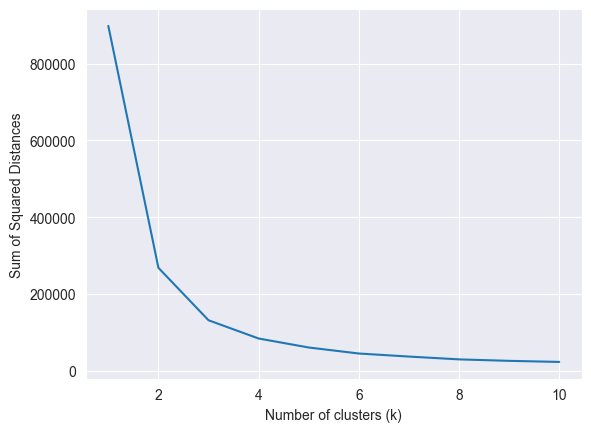

In [6]:
inertia = []
for nc in range(1,11):
    kmeans = KMeans(n_clusters=nc, random_state=0).fit(one_hot_df)
    inertia.append(kmeans.inertia_)
interias = pd.DataFrame({'n_clusters': range(1, 11), 'inertia': inertia})

plot = interias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plot.legend().set_visible(False)
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(one_hot_df)
memb = pd.DataFrame(kmeans.labels_, one_hot_df.index, columns=['Cluster'])

In [8]:
train_df = memb
train_df['default'] = df_prev_success['default'].map({'yes': True, 'no': False}).reset_index(drop=True)
train_df['loan'] = df_prev_success['loan'].map({'yes': True, 'no': False}).reset_index(drop=True)
train_df['housing'] = df_prev_success['housing'].map({'yes': True, 'no': False}).reset_index(drop=True)

In [9]:
cont_features_transform = ['month','day_of_week']

for feature in cont_features_transform:
    feature_df =  pd.get_dummies(df_prev_success[feature])
    train_df = pd.concat([train_df.reset_index(drop=True), feature_df.reset_index(drop=True)], axis=1)

In [10]:
numeric_X = df_prev_success[['campaign', 'pdays', 'previous']]
y = df_prev_success['duration']

In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
numeric_X = pd.DataFrame(scaler.fit_transform(numeric_X), columns = numeric_X.columns)

In [12]:
Xnew = pd.concat([train_df, numeric_X], axis=1)
Xnew

,Cluster,default,loan,housing,apr,aug,dec,jul,jun,mar,...,oct,sep,fri,mon,thu,tue,wed,campaign,pdays,previous
0,2,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,-0.439330,-0.733568,0.276290
1,1,True,True,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,1.589742,0.809436,-0.783630
2,2,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,-0.520493,-0.254342,2.396131
3,1,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,-0.439330,0.032668,1.866171
4,0,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,-0.439330,-1.423444,0.806250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,1,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,-0.439330,0.727810,-0.783630
2948,0,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,-0.439330,0.559290,2.396131
2949,1,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,-0.439330,0.933192,-0.783630
2950,1,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,-0.277004,0.617219,0.806250


In [13]:
# import train_test split
from sklearn.model_selection import train_test_split
# split data into train and test, 80% in training and 20% in testing
X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.2,
                                                    random_state = 99)

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [15]:
coeff_df = pd.DataFrame(lin_reg.coef_, Xnew.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Cluster,-3.212292e+01
default,-2.705691e+01
loan,6.158014e+01
housing,-1.125205e+02
apr,6.657081e+15
aug,6.657081e+15
dec,6.657081e+15
jul,6.657081e+15
jun,6.657081e+15
mar,6.657081e+15
